In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train.csv
/kaggle/input/gender_submission.csv
/kaggle/input/test.csv


**LOADING LIBRARIES**

The first step is to load all the necessary packages and libraries that will be used in this kernel. This includes :
* Numpy & Pandas for handling our Data & DataFrames.
* Matplotlib, Seaborn for visualitsations.
* Machine learning packages (from SKlearn) for training and prediction.


In [2]:
#for analysis of data, dataframe
import numpy as np
import pandas as pd

#for plotting and stuffs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#the above line of code is known as a magic function, helps to display our plots just below our code in the notebook.

#for model training & prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

**LOAD THE DATA !**

We are given 3 files, one for training(train.csv) one for testing(test.csv) and a sample submission file(gender_submission.csv).
We shall read the first 2 files using pandas.

In [3]:
#read training data into 'train_df' dataframe
train_df=pd.read_csv('../input/train.csv')

#read testing data into 'test_df' dataframe
test_df=pd.read_csv('../input/test.csv')

#combined dataset, will be handy in wrangling steps.
combined_df=[train_df,test_df]

**Get to know the data we've loaded.** 

* This shall be the first step after we read data into dataframes.
* We should know how many rows, columns the dataset has, their names, the values stored and their datatypes.
* All this forms the first part of any analysis.

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Shown above - name of columns of both training & testing data, and it is clear from it that the test data is missing "Survived" column, and it is our **aim to predict that column**.

In [6]:
#to know what type of data columns hold ; 'object' type means they hold string values
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

From above it is clear which columns hold 'int', 'float' and 'strings'. This is important as we will convert them accordingly ahead, to make it understandable for the machine(models) to do training, prediction etc.

Another method to have a detailed info about our dataset is to use ".info()". As shown below.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


From above it is clear that, our training data has 891 entries, with "Age", "Cabin" & "Embarked" columns having missing values.
Our test data has 418 entries, and for these given 418 entries, we have to predict their survival. Even the test data is missing some values in "Age", "Fare", "Cabin" columns.

In [10]:
#train_df.info(verbose=False) will give a compact version of the above output, it set to True by default(in above case).
train_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 12 entries, PassengerId to Embarked
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**First look of our data !**

In [11]:
train_df.head() #by default it prints first 5 rows, any other integer can also be given inside parenthesis.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


As seen above- this is how data looks in the dataframe -train_df & test_df we created. Sweet. We can infer that:
* There are few categorical variables.
* Pclass has 3 categories namely 1,2 & 3
* Sex - male, female category
* Embarked has 3 catefories - S,Q,C
* Survived has 2 - 1(survived) or 0(not survived)
* Other columns such as Age, Ticket, Fare have continuous numerical values.

In [13]:
train_df.describe()
#this gives metric/stats of various columns.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From above it is clear that, 
* mean age of traveller onboard the Titanic is about 30.
* The max age is 80 and min. is 0.42 (few months old baby !)
* the avg. survival rate is 0.38, meaning the survival rate was less than 50% for passengers ! [Note: 1 means survived & 0 means not survived]
* The mean fare is around 32 and the max fare is 512. Also looking at the std.deviation of Fare, it seems Fare varied greatly.




**Further Analysis**

Now, we shall do detailed analysis of the data. Our goal is to predict survival for test data, and to do that we should find out what all factors(features) led to the survival(Survived=1) of a person.

For such detailed analysis, plots are the best !

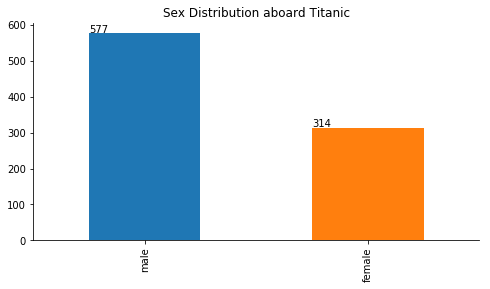

In [14]:
ax=train_df['Sex'].value_counts().plot.bar(title='Sex Distribution aboard Titanic',figsize=(8,4))

#below loop is to print numeric value above the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()*1.005))

sns.despine()  #to remove borders (by default : from top & right side)

It is clear from above bar graph that the male population on the titanic exceeded the female population. But what was their survival rate ? We'll find out.

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 0, '<---AGE--->')

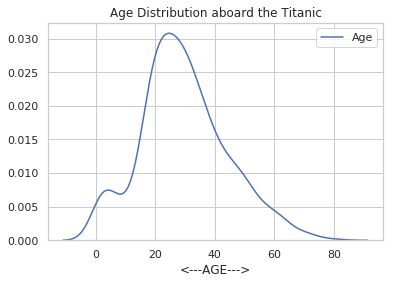

In [15]:
sns.set(style='whitegrid')
ax=sns.kdeplot(train_df['Age'])
ax.set_title('Age Distribution aboard the Titanic')
ax.set_xlabel('<---AGE--->')

The above graph shows that,
* most population was in the age group 20-40 years
* toddlers+children exceeded old folks(>60 yrs) in number

0    549
1    342
Name: Survived, dtype: int64


Text(0, 0.5, '')

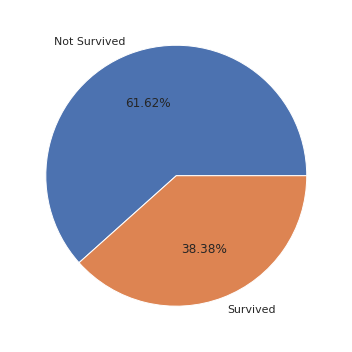

In [16]:
print(train_df['Survived'].value_counts())
l=['Not Survived','Survived']
ax=train_df['Survived'].value_counts().plot.pie(autopct='%.2f%%',figsize=(6,6),labels=l)
#autopct='%.2f%%' is to show the percentage text on the plot
ax.set_ylabel('')

* We see from above, among 891 entries in training data, just 342 (38% as seen in pie chart) survived !
* 549 passengers or ~61% did not make it !

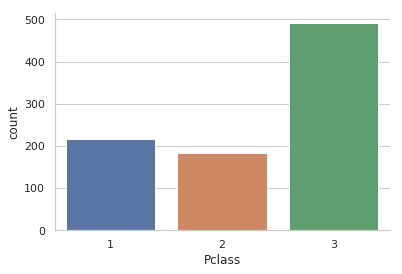

In [17]:
sns.countplot(train_df['Pclass'])
sns.despine()

We can see from above graph, majority(more than 400) travelled in Class3, followed by Class1(~200). We will soon find out chances of survival based on PClass !

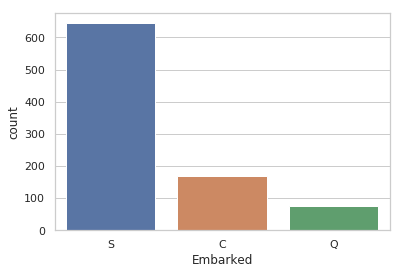

In [18]:
sns.countplot(train_df['Embarked'])

More than 600 passengers embarked from 'S', followed by 'C' and then 'Q'.

Now, we'll find how these columns relate to Survival (if at all).

In [19]:
train_df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


The above table makes it clear that, the survival of a female passenger was much higher than male passenger.

In [20]:
train_df[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [21]:
train_df.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

We see above that, higher the Passenger class, higher the survival rate.

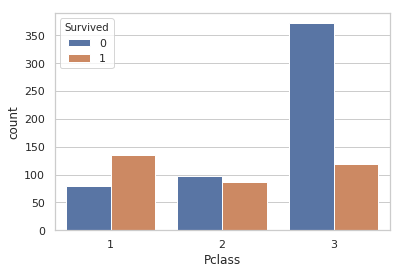

In [22]:
sns.countplot(x='Pclass',hue='Survived',data=train_df)

from the above table, we infer that, 
* Survival chances of passengers from Class 1 was the highest. Interms of numbers also, Class 1 passengers survived most.
* Despite Class3 having the most passengers their **Survival rate** was the lowest, though the numbers were high compared to Class2 !
* Above can be corroborated from the bar graph above.

* **Hence we can say, the PClass in which passengers travelled had a role to play in their Survival**

In [23]:
train_df[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Embarked vs Survived table shows that :
* People embarked from 'C' had high Survival.
* Followed by from 'Q' and 'S'

In [24]:
train_df[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [25]:
train_df[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


We can see from above 2 tables that:
SibSp i.e number of siblings ans spouse aboard the Titanic, Parch- number of parent/children don't show any pattern/trend with survival, meaning :
Looking at the table of Parch & Survival, first Survival rate increases first, then decreases, then again increases.
The graph below makes it clear.

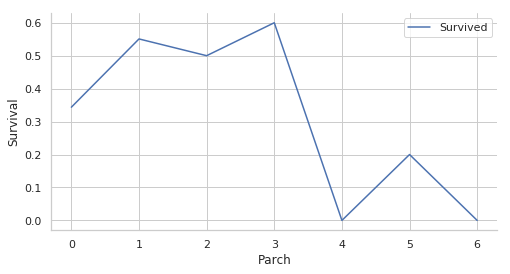

In [26]:
ax=train_df[['Parch','Survived']].groupby('Parch').mean().plot.line(figsize=(8,4))
ax.set_ylabel('Survival')
sns.despine()

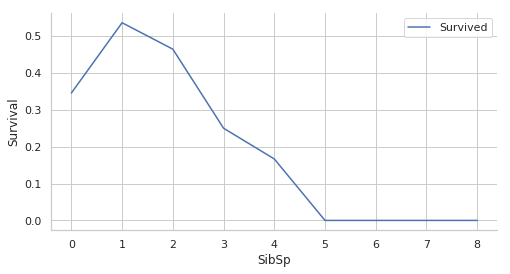

In [27]:
ax=train_df[['SibSp','Survived']].groupby('SibSp').mean().plot.line(figsize=(8,4))
ax.set_ylabel('Survival')
sns.despine()

The above SibSp vs Survival graph first increases (for SibSp 0 to 1) then comes down (for SibSp 1 to 5) eventually to become zero.

**Now, lets map certain features on survival and see how they relate to it and understand their PLOTS**

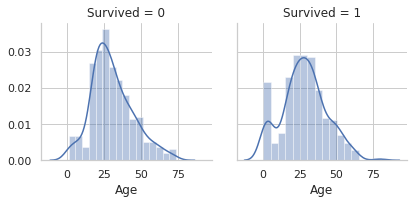

In [28]:
a=sns.FacetGrid(train_df,col='Survived')
a.map(sns.distplot, 'Age')

Looking at the peaks in above plots, we observe :
* Many toddlers+children(upto 10 yrs age) survived
* Many teenagers 20-25 years old, didn't survive
* Many middle aged passengers, 30-45 survived.

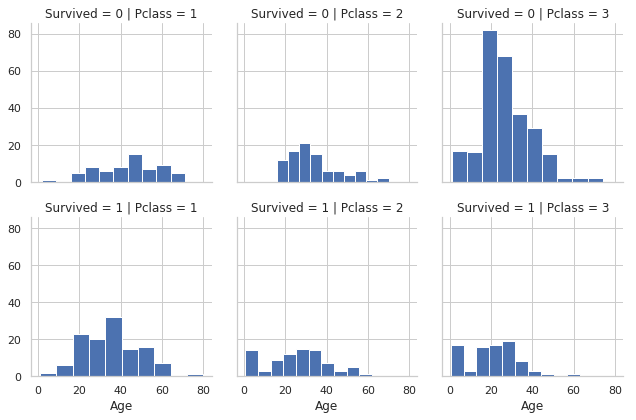

In [29]:
a=sns.FacetGrid(train_df,col='Pclass',row='Survived')
a.map(plt.hist,'Age')

The above plot further strengthens our observations made earlier:
* Among the the Classes, Class 3 had most deaths, that too in 20-30 age group.
* Class 1 had the lowest passenger deaths.
* Survival percentage of Class 1 passenger was highest, that too in age group 30-40.

In [30]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

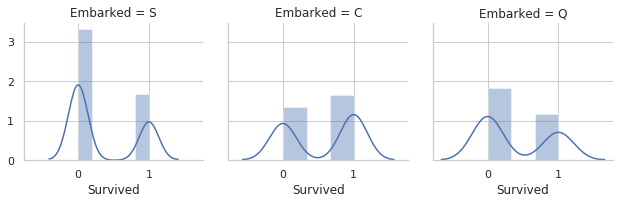

In [31]:
a=sns.FacetGrid(train_df,col='Embarked')
a.map(sns.distplot,'Survived')

In [32]:
train_df.groupby(['Embarked','Survived'])['Embarked'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Embarked, dtype: int64

The above plots and result analyse 'Embarked' and whether it impacts Survival. We find that :
* In terms of numbers, max survival and also death, comes from passengers who embarked from 'S'.
* Survival of members from 'S' is high compared to 'Q' and 'C'.
* Passengers embarked from 'Q' had the least survival.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


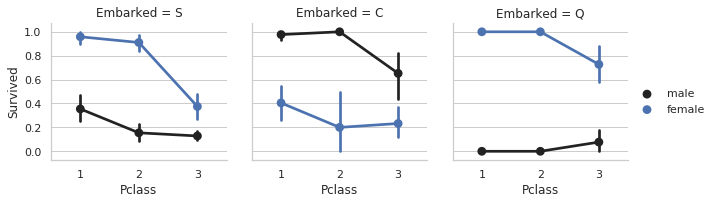

In [33]:
a=sns.FacetGrid(train_df,col='Embarked')
a.map(sns.pointplot, 'Pclass','Survived','Sex') #colum order is x='Pclass', y='Survived', hue='Sex'
a.add_legend()

In [34]:
train_df.groupby(['Embarked','Sex'])['Embarked'].count()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: Embarked, dtype: int64

The above pointplot may seem complex, but is simple and insightful one.

* Among passengers embarked from S, females had high survival compared to males. Also, as seen in first plot, the Survival decresed as we go from Pclass 1 to 3, for both sexes. (NOTE : Strong dip in Survival of females from Pclass 2 to 3)

* Third plot, Embarked='Q', also has similar pattern, with females of high Pclass having high survival. BUT, males of Pclass 3 had slightly high survival chance compared to Pclass 2 & 3 (strange).

* Now from the second plot, Embarked='C', this plot is unusual, as we can see** males survived more than female**. 

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


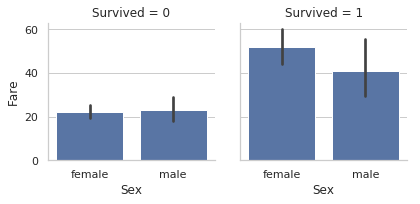

In [35]:
a=sns.FacetGrid(train_df,col='Survived')
a.map(sns.barplot,'Sex', 'Fare')

The above plot confirms that :
* Those who paid a higher ticket fare had more chances of Survivng.
* Also,females paid higher ticket price compared to males.

**Data Wrangling**

* Data Wrangling involves cleaning, organizing the data, making it more suitable for machine learning.
* it involves steps, such as removing nulls, mapping, encoding etc.

Remember, we had combined both training and testing data earlier, below is a view of it.

In [36]:
combined_df[0].head(3) #[0] is train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [37]:
combined_df[1].head(3)  #[1] is test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [38]:
print('training data dimensions :',train_df.shape)
print('testing data dimensions :', test_df.shape)
print('combined data\'s dimension are :\n',combined_df[0].shape,'\n',combined_df[1].shape)

training data dimensions : (891, 12)
testing data dimensions : (418, 11)
combined data's dimension are :
 (891, 12) 
 (418, 11)


In [39]:
train_df[['PassengerId','Name','Ticket','Cabin']].head()

,PassengerId,Name,Ticket,Cabin
0,1,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85
2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123
4,5,"Allen, Mr. William Henry",373450,NaN


We can see that, 'Name' 'Cabin' and 'Ticket' columns are random, and have no impact on Survival of passenger as other features had. Seriously - "Whats in a name?!"

* Hence, we shall remove these columns (done below), as they don't contribute to our analysis.
* Also, we saw earlier, SibSp, Parch didn't have any effect on Survival of a passenger, so remove those too.
* Note : We will remove Passenger Id from the training data set also.

In [40]:
#removing mentioned columns from dataset
train_df=train_df.drop(['Name','Ticket','Cabin','SibSp','Parch','PassengerId'],axis=1)
test_df=test_df.drop(['Name','Ticket','Cabin','SibSp','Parch'],axis=1)

In [41]:
# the combined data
combined_df=[train_df, test_df]

In [42]:
#lets check the new dimensions
print('new training data dimensions :',train_df.shape)
print('new testing data dimensions :', test_df.shape)
print('new combined data\'s dimension are :\n',combined_df[0].shape,'\n',combined_df[1].shape)

new training data dimensions : (891, 6)
new testing data dimensions : (418, 6)
new combined data's dimension are :
 (891, 6) 
 (418, 6)


In [43]:
train_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S


In [44]:
#checking for any null values
train_df.isnull().any() #True means null present

Survived    False
Pclass      False
Sex         False
Age          True
Fare        False
Embarked     True
dtype: bool

In [45]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age             True
Fare            True
Embarked       False
dtype: bool

Null values interfere with our training and prediciton. So they have to be removed or be filled with relevant, suitable data.
* Above results show, which columns have null values.. we'll correct them one by one.

In [46]:
# age columns
print('mean age in train data :',train_df['Age'].mean())
print('mean age in test data :',test_df['Age'].mean())

mean age in train data : 29.69911764705882
mean age in test data : 30.272590361445783


Since mean age in both datasets is near 30, we'll replace null values with 30.

In [47]:
#replacing null values with 30 in age column
for df in combined_df:
    df['Age']=df['Age'].replace(np.nan,30).astype(int)

In training data, 'Embarked' also has missing values..

In [48]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [49]:
#most people embarked from 'S'. So, we'll replace the missing missing Embarked value by 'S'.
train_df['Embarked']=train_df['Embarked'].replace(np.nan,'S')

The test data is missing values in Fare column. Lets deal with that now.

In [50]:
#finding mean fare in test data
test_df['Fare'].mean()

35.6271884892086

In [51]:
#replace missing fare values in test data by mean
test_df['Fare']=test_df['Fare'].replace(np.nan,36).astype(int)

In [52]:
combined_df=[train_df,test_df]
for df in combined_df:
    print(df.isnull().any()) #bool value = False means that there are no nulls in the column.

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
Embarked    False
dtype: bool
PassengerId    False
Pclass         False
Sex            False
Age            False
Fare           False
Embarked       False
dtype: bool


We have successfully dealt with NULL values. 

As we know, some column have ***categorical values*** such as Sex, Pclass, Embarked.

The values in these columns can be "categorised" or can be put into certain categories. For eg: Sex in our dataset can be categorised as either male or female, similarly Embarked into S,Q,C.

We will now convert these into numeric data, or codify them. As done below. This is known as **ENCODING**


In [53]:
#will code female as 1 and male as 0
for df in combined_df:
    df['Sex']=df['Sex'].map({'female':1,'male':0}).astype(int)

In [54]:
train_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22,7.2500,S
1,1,1,1,38,71.2833,C
2,1,3,1,26,7.9250,S


As seen above, 'Sex' column has been changed, males have been coded as 0 and females as 1.

In [55]:
#coding Embarked column as: S=2, C=1, Q=0
for df in combined_df:
    df['Embarked']=df['Embarked'].map({'S':2,'C':1,'Q':0}).astype(int)

In [56]:
train_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22,7.2500,2
1,1,1,1,38,71.2833,1
2,1,3,1,26,7.9250,2


As seen above, 'Embarked' column has been changed, S, C and Q have been coded or changed to numeric values.

We know from earlier analysis that age was a factor in the survival of a passenger.

Also the range of values age takes is very high(from 0.42 to 80).

* So we shall divide age in to age groups/bands for easier training and prediction. This is called **BINNING**.

In [57]:
#binning or making bands of age into intervals and then assigning labels to them(encoding the bands as 0,1,2,3,4)
for df in combined_df:
    df['Age']=pd.cut(df['Age'],5,labels=[0,1,2,3,4]).astype(int) #pandas cut will help us divide age in bins

In [58]:
train_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,1,7.2500,2
1,1,1,1,2,71.2833,1
2,1,3,1,1,7.9250,2


Similarly, we found out earlier that Fare played imp. role in survival, so we bin fare in to groups, just as we did for age.

In [59]:
#binning fares and assigning label 0,1,2,3 to their respective bins
for df in combined_df:
    df['Fare']=pd.qcut(df['Fare'],4,labels=[0,1,2,3]).astype(int)

In [60]:
train_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,1,0,2
1,1,1,1,2,3,1
2,1,3,1,1,1,2


In [61]:
test_df.head(3)

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,0,2,0,0
1,893,3,1,3,0,2
2,894,2,0,4,1,0


As seen above, we have modified our train and test datas, making it suitable for our models, to do training & prediciton properly.

So, our final dataframe looks like the one shown above,
* Pclass, Sex, Age(binned), Embarked and Fare(binned) will be our feature set, i.e these play a factor in the survival of passenger and will be used in PREDICTION of test data. 

**MODELLING and PREDICTION**

The following models have been used:
* Logistic Regression

* Random Forest Classifier

* Decision Tree Classifier

In [62]:
X_train=train_df.drop('Survived',axis=1)
Y_train=train_df['Survived']

#X_train is the entire training data except the Survived column, which is separately stored in Y_train. We will use these to train our MODEL !

X_test=test_df.drop('PassengerId',axis=1).copy()
#X_test is the test data, for on which we will apply model and predict the "SURVIVED" column for its entries.

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
#first applying Logistic Regression

lg = LogisticRegression()
lg.fit(X_train, Y_train)
Y_pred1 = lg.predict(X_test)
accu_lg = (lg.score(X_train, Y_train))
round(accu_lg*100,2)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.01

In [65]:
#applying decision tree

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
Y_pred2 = dtree.predict(X_test)
accu_dtree = (dtree.score(X_train, Y_train))
round(accu_dtree*100,2)

84.85

In [66]:
#applying random forest

rafo = RandomForestClassifier(n_estimators=100)
rafo.fit(X_train, Y_train)
Y_pred3 = rafo.predict(X_test)
accu_rafo = rafo.score(X_train, Y_train)
round(accu_rafo*100,2)

84.85

We note that :

* Score of Logistic Regression is lowest

* The score from Decision Tree and Random forest is similar.

In [67]:
#our goal was to predict survived column for test data, and were asked to submit a dataframe with 'PassengerId' and 'Survived' columns

submission=pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':Y_pred3})

In [68]:
submission.shape

(418, 2)

In [69]:
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


From above it is clear, the Submission file is as per the requirement. Now writing it to csv file format.

In [70]:
submission.to_csv('submission.csv', index=False)

*Thank You*